In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from fcmeans import FCM
from sklearn.manifold import TSNE
from umap.umap_ import UMAP

In [ ]:
df = pd.read_csv(r"/content/data.txt")
df.head(10)

,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
0,7.8913,1.4164,5.8540,0.005480,-0.002104,0.002071,-0.79389,-0.075185,0.11990,0.12306,...,-0.040811,-2.6856,-9.0822,2.5861,-0.004630,0.005853,-0.000870,0.73931,0.30489,-0.056590
1,7.7722,1.4323,5.8085,0.000006,-0.005586,0.010272,-0.79371,-0.075989,0.12072,0.22565,...,-0.042167,-2.7530,-9.0746,2.6448,0.011571,-0.006638,-0.001867,0.74042,0.30397,-0.056270
2,7.8169,1.3878,5.7414,0.024652,0.017304,-0.008033,-0.79371,-0.075468,0.12072,0.29394,...,-0.041640,-2.8204,-9.0818,2.6735,-0.010919,0.013875,-0.003453,0.74030,0.30491,-0.057627
3,7.7576,1.4696,5.7713,0.006318,-0.020122,-0.000602,-0.79361,-0.075385,0.12248,0.27431,...,-0.041879,-2.8054,-9.0819,2.6738,-0.027197,0.003055,-0.003492,0.74108,0.30451,-0.056258
4,7.8918,1.4319,5.6751,-0.008069,0.014299,0.019301,-0.79361,-0.075255,0.12248,0.23506,...,-0.045496,-2.7755,-9.1043,2.6144,-0.017289,-0.001357,-0.001750,0.74115,0.30423,-0.055450
5,7.8622,1.4324,5.6002,-0.010086,-0.039679,0.004932,-0.79464,-0.075529,0.12338,0.21801,...,-0.042628,-2.7756,-9.0966,2.5696,-0.017434,-0.004719,0.009081,0.73973,0.30370,-0.056554
6,7.8991,1.4022,5.6898,-0.014355,0.003229,-0.008931,-0.79292,-0.075727,0.12534,0.21548,...,-0.042802,-2.7756,-9.1116,2.5845,-0.004686,0.009557,0.003719,0.74044,0.30436,-0.055876
7,7.8622,1.4472,5.6153,-0.013356,0.019318,-0.009917,-0.79311,-0.075701,0.12439,0.21301,...,-0.041735,-2.7755,-9.0967,2.5995,-0.000985,0.000422,-0.005397,0.73942,0.30383,-0.057101
8,7.8772,1.4325,5.5556,0.000421,0.053221,-0.013694,-0.79475,-0.075408,0.12378,0.23040,...,-0.043853,-2.7680,-9.0820,2.6445,0.008108,0.002132,-0.010838,0.74086,0.30331,-0.055842
9,7.8769,1.4468,5.6751,0.006830,0.083917,0.004429,-0.79499,-0.076461,0.12432,0.23028,...,-0.042033,-2.7755,-9.0818,2.6145,0.004298,0.010539,0.006416,0.73997,0.30357,-0.056945


In [ ]:
from sklearn import preprocessing\
scaler = preprocessing.MinMaxScaler().fit(df.to_numpy())
scaled_data = scaler.transform(df.to_numpy())
data = pd.DataFrame(scaled_data)
pd.DataFrame(data).describe()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,...,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,0.535550,0.492948,0.351419,0.496844,0.460801,0.455066,0.528841,0.576275,0.572102,0.440489,...,0.568969,0.597081,0.560403,0.550789,0.531786,0.572052,0.564092,0.523591,0.479912,0.555870
std,0.149931,0.156418,0.147579,0.150439,0.173176,0.169998,0.232488,0.220451,0.225699,0.169555,...,0.183734,0.115706,0.169978,0.238865,0.202347,0.166459,0.204957,0.173725,0.187515,0.214665
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.464552,0.417994,0.251768,0.397224,0.358777,0.336203,0.346863,0.408553,0.421589,0.317812,...,0.466604,0.531693,0.497200,0.421003,0.424085,0.459026,0.418972,0.397833,0.351770,0.405309
50%,0.536410,0.489222,0.346792,0.482022,0.453524,0.435007,0.533210,0.589920,0.573829,0.403982,...,0.600977,0.625104,0.502800,0.570482,0.531279,0.568797,0.553216,0.534056,0.471239,0.562481
75%,0.608027,0.588097,0.423171,0.592341,0.553012,0.568451,0.706642,0.752577,0.723523,0.551802,...,0.695967,0.625104,0.666293,0.711447,0.642008,0.694940,0.734441,0.628483,0.619469,0.692812
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


D:\newprograms\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


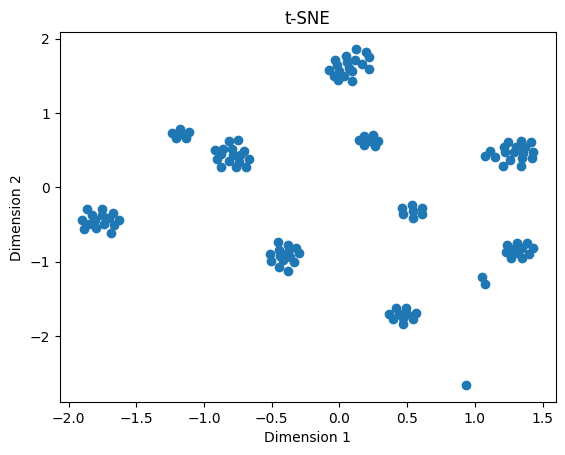

In [ ]:
model = TSNE(perplexity=10, learning_rate=400, n_iter=5000)
transformed = model.fit_transform(df)
scaler = StandardScaler()
scaler.fit(transformed)
new_data_main = pd.DataFrame(scaler.transform(transformed), columns = ["Dimension_1", "Dimension_2"])
plt.scatter(new_data_main.iloc[:, 0], new_data_main.iloc[:, 1])
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("t-SNE")
plt.show()

# Иерархические алгоритмы кластеризации

### Иерархическая кластеризация с использованием метода Уорда для вычисления расстояний между кластерами.

Иерархическая кластеризация - это метод группирования объектов в кластеры на основе их сходства друг с другом. Метод Уорда - это один из способов вычисления расстояний между кластерами в ходе иерархической кластеризации. 

Метод Уорда основывается на минимизации дисперсии суммы квадратических отклонений внутри каждого кластера при объединении двух кластеров в один. Этот метод даёт более устойчивые результаты, т.к. стремится сохранить баланс между инерцией кластеров и их числом. 

Использование метода Уорда позволяет избежать проблем связанных с определением оптимального числа кластеров, так как этот метод не требует задания заранее определенного числа кластеров. В результате выполнения иерархической кластеризации с помощью метода Уорда получается дерево кластеров (дендрограмма), которая позволяет наглядно изучать отношения между кластерами и их распределение.

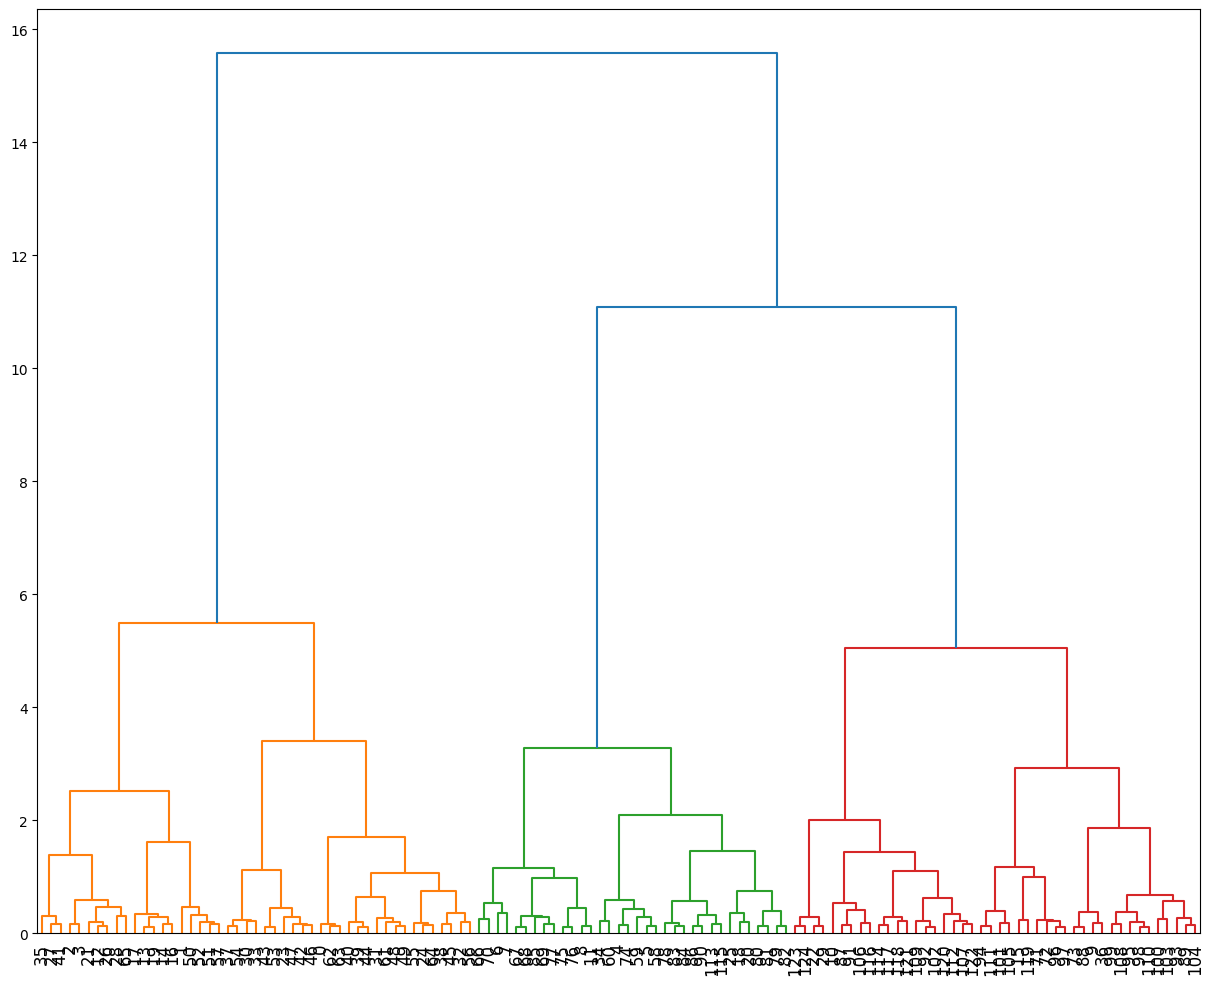

In [ ]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
#расчет матрицы связей
new_data = new_data_main.copy()
distance_matrix_byWard = linkage(new_data, method = 'ward', metric = 'euclidean')

#построение дендрограммы
fig = plt.figure(figsize=(15,12))
fig.patch.set_facecolor('white')
R = dendrogram(distance_matrix, leaf_font_size=12)
plt.show()

#Разные цвета - разные автоматически определённые кластеры

Методом Варда выделил 4 кластера

In [ ]:
result_ward = pd.DataFrame(fcluster(distance_matrix_byWard, 4, criterion='maxclust'), columns=['target'])

Text(0.5, 1.0, 'Кластеры, найденные методом Уорда')

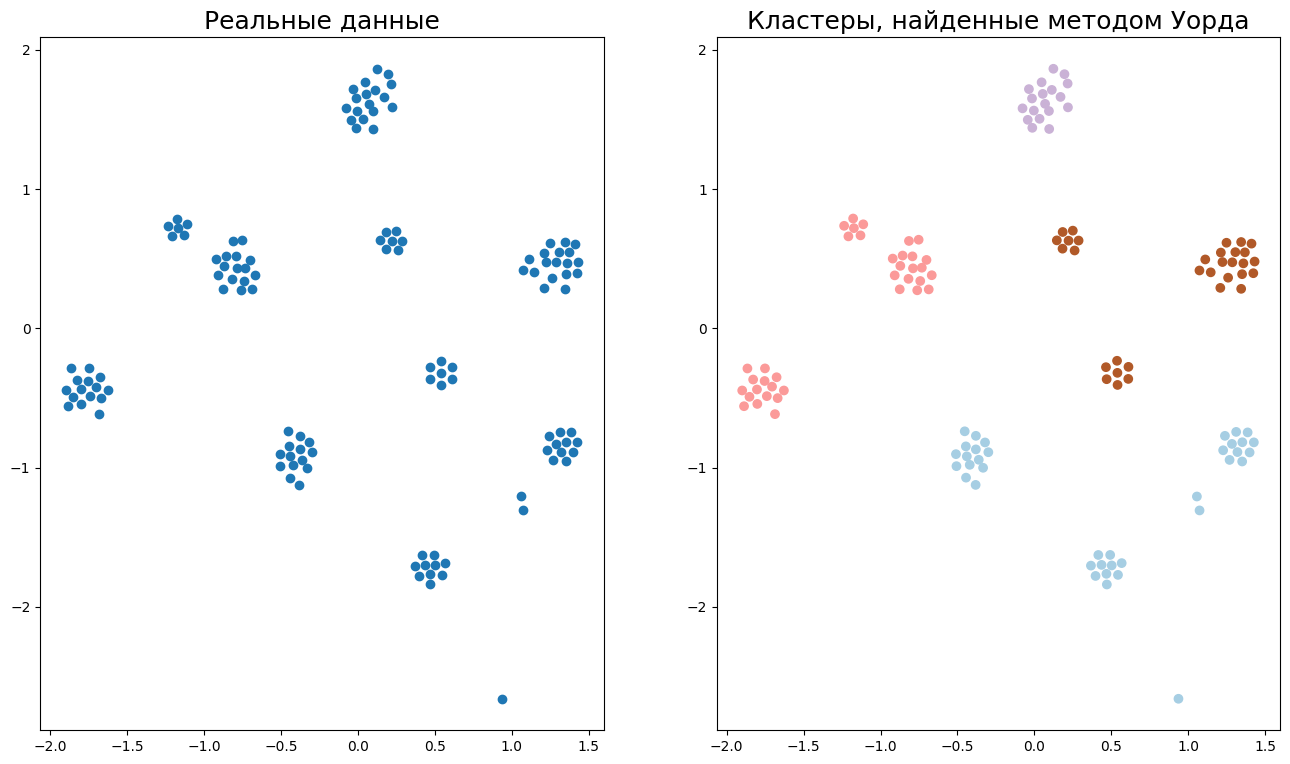

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16,9))
axes[0].scatter(new_data.iloc[:,0], new_data.iloc[:,1])
axes[0].set_title("Реальные данные", fontsize = 18)
axes[1].scatter(new_data.iloc[:,0], new_data.iloc[:,1], c=result_ward.values, cmap = plt.cm.Paired)
axes[1].set_title("Кластеры, найденные методом Уорда", fontsize = 18)

In [ ]:
print(f"Индекс кластерного силуэта:{np.round(silhouette_score(new_data, result_ward.values.ravel()),2)}")
print(f"Индекс Дэвиса–Булдина:{np.round(davies_bouldin_score(new_data, result_ward.values.ravel()),2)}")
print(f"Коэффициент отношения вариаций: {np.round(calinski_harabasz_score(new_data, result_ward.values.ravel()),2)}")

Индекс кластерного силуэта:0.5099999904632568
Индекс Дэвиса–Булдина:0.73
Коэффициент отношения вариаций: 141.99


### Иерархическая кластеризация с использованием метода взвешенных парных групп со средним арифметическим для вычисления расстояний между кластерами.

Иерархическая кластеризация с использованием метода взвешенных парных групп со средним арифметическим - это метод кластеризации в машинном обучении и анализе данных, который использует метод парных групп для определения расстояний между кластерами. В этом методе каждый объект или элемент данных вначале рассматривается как отдельный кластер. Затем два ближайших кластера объединяются в один новый кластер с помощью выбранного метода вычисления расстояний, который в данном случае является средним арифметическим расстояний между всеми парами объектов в объединенных кластерах. 

Процесс объединения продолжается, пока все объекты не будут объединены в один кластер. Результатом является дендрограмма, которая представляет собой древовидное представление кластеризации. Каждая ветвь на дендрограмме соответствует объединению двух кластеров, а расстояние на оси Y показывает расстояние между этими кластерами. 

Этот метод помогает определить различные уровни разбиения данных на кластеры, что может быть полезно для анализа больших наборов данных.

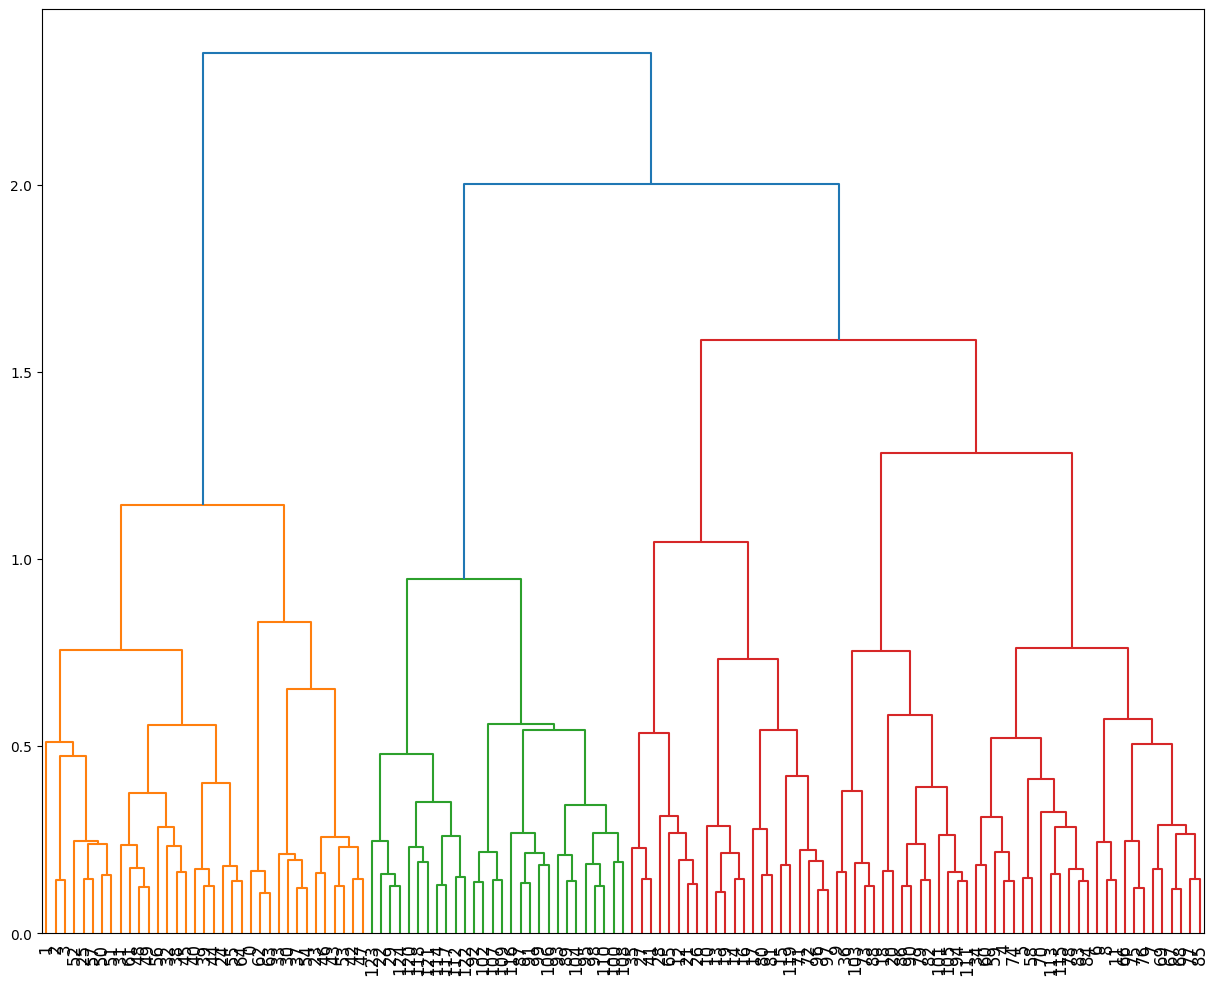

In [ ]:
#расчет матрицы связей
distance_matrix_weighted = linkage(new_data, method = 'weighted', metric = 'euclidean')

#построение дендрограммы
fig = plt.figure(figsize=(15,12))
fig.patch.set_facecolor('white')
R = dendrogram(distance_matrix_single, leaf_font_size=12)
plt.show()

С использованием метода взвешенных парных групп со средним арифметическим было выделено 4 кластера.

Text(0.5, 1.0, 'Кластеры, найденные методом весов')

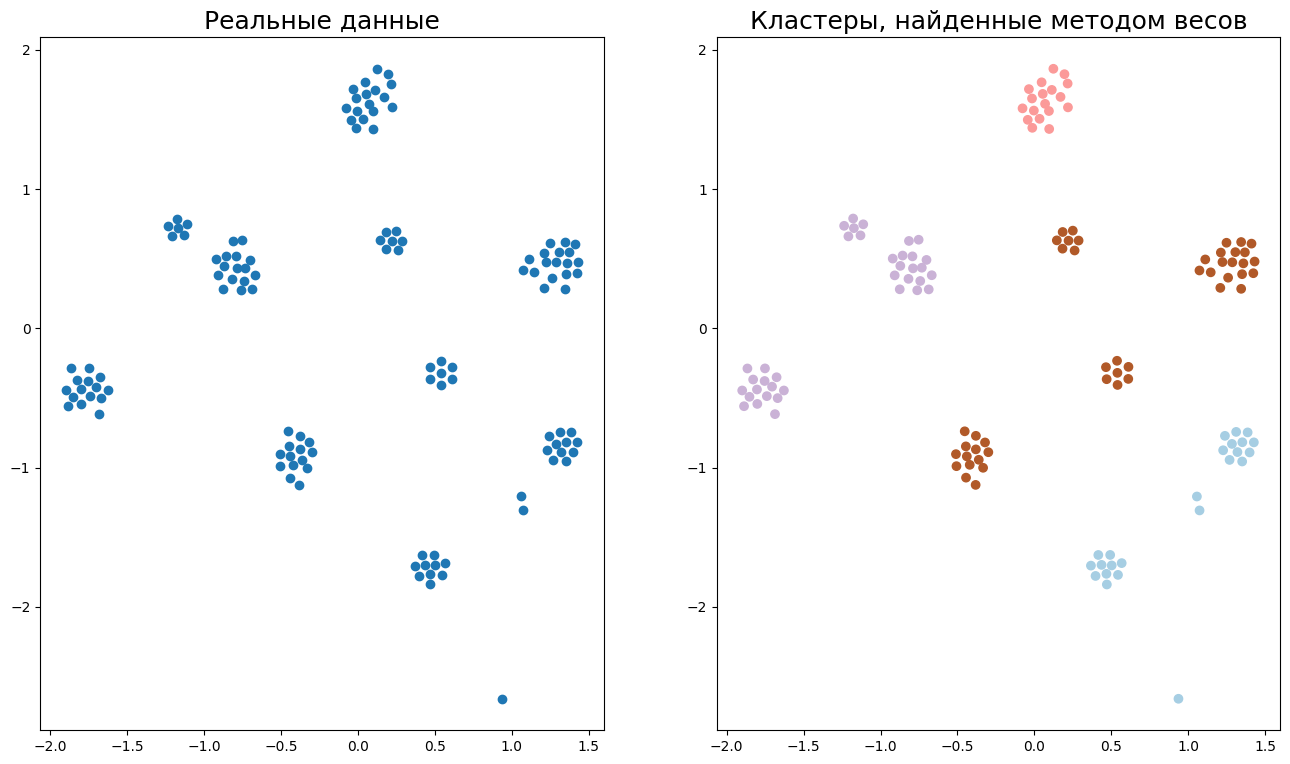

In [ ]:
result_weighted = pd.DataFrame(fcluster(distance_matrix_weighted, 4, criterion='maxclust'), columns=['target'])
fig, axes = plt.subplots(1, 2, figsize=(16,9))
axes[0].scatter(new_data.iloc[:,0], new_data.iloc[:,1])
axes[0].set_title("Реальные данные", fontsize = 18)
axes[1].scatter(new_data.iloc[:,0], new_data.iloc[:,1], c=result_weighted.values, cmap = plt.cm.Paired)
axes[1].set_title("Кластеры, найденные методом весов", fontsize = 18)

In [ ]:
print(f"Индекс кластерного силуэта:{np.round(silhouette_score(new_data, result_weighted.values.ravel()),2)}")
print(f"Индекс Дэвиса–Булдина:{np.round(davies_bouldin_score(new_data, result_weighted.values.ravel()),2)}")
print(f"Коэффициент отношения вариаций: {np.round(calinski_harabasz_score(new_data, result_weighted.values.ravel()),2)}")

Индекс кластерного силуэта:0.4699999988079071
Индекс Дэвиса–Булдина:0.94
Коэффициент отношения вариаций: 104.43


### Иерархическая кластеризация с использованием метода полной связи для вычисления расстояний между кластерами.

Иерархическая кластеризация - это метод анализа данных, который используется для группировки объектов в подмножества или кластеры на основе их сходства. Метод полной связи, или максимум-минимум, - это один из подходов к определению расстояния между кластерами в иерархической кластеризации. Он определяет расстояние между двумя кластерами как максимальное расстояние между любыми двумя объектами из каждого кластера. Это позволяет создавать жесткие, компактные кластеры с минимальной интервариатностью между кластерами. Однако, метод полной связи может привести к образованию некоторых выбросов в кластерах, поэтому его использование не всегда является оптимальным.

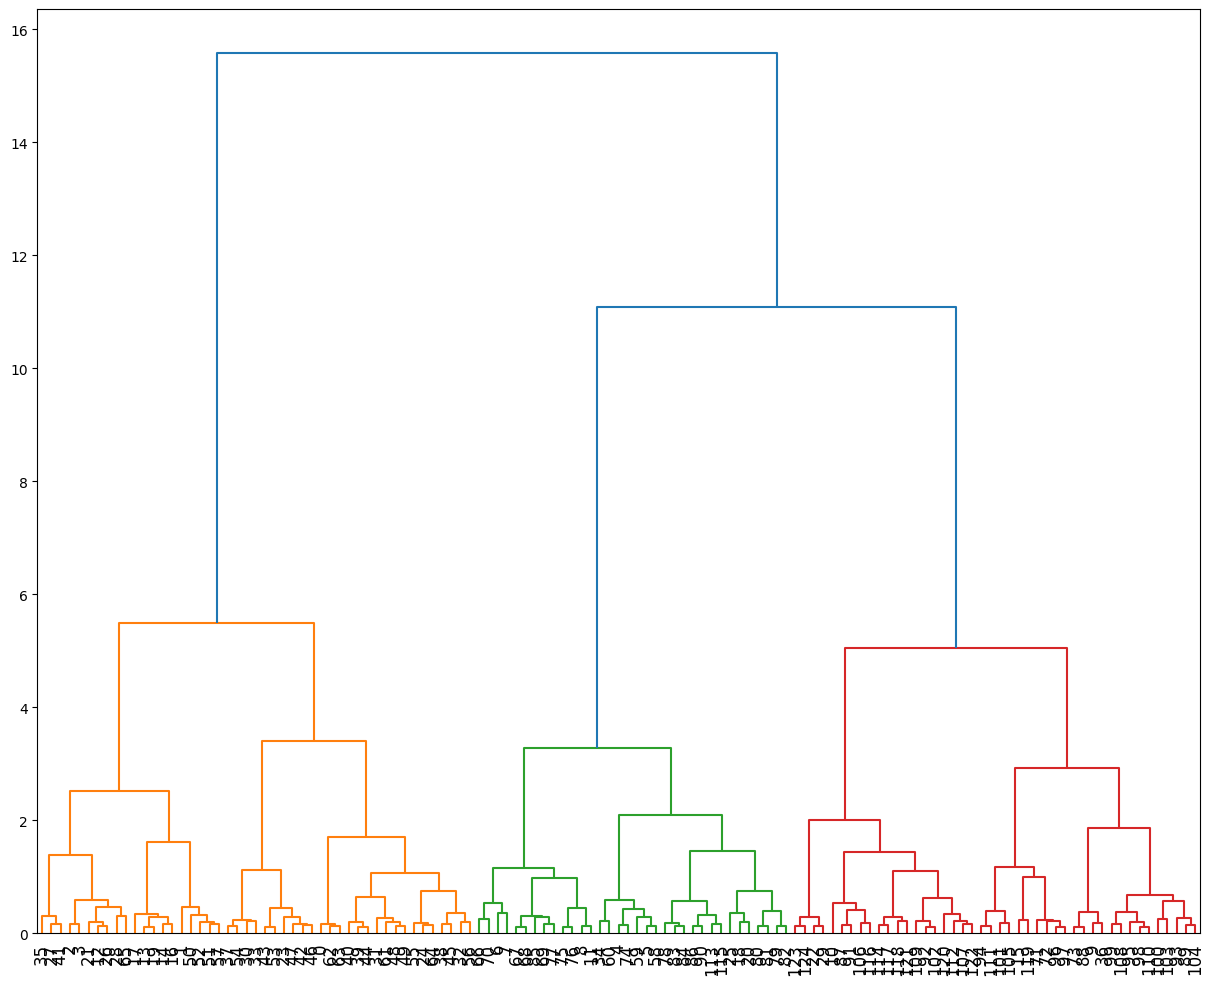

In [ ]:
#расчет матрицы связей
distance_matrix_complete = linkage(new_data, method = 'complete', metric = 'euclidean')

#построение дендрограммы
fig = plt.figure(figsize=(15,12))
fig.patch.set_facecolor('white')
R = dendrogram(distance_matrix, leaf_font_size=12)
plt.show()

Было определено 4 кластера с помощью метода полной связи

Text(0.5, 1.0, 'Кластеры, найденные методом полной связи')

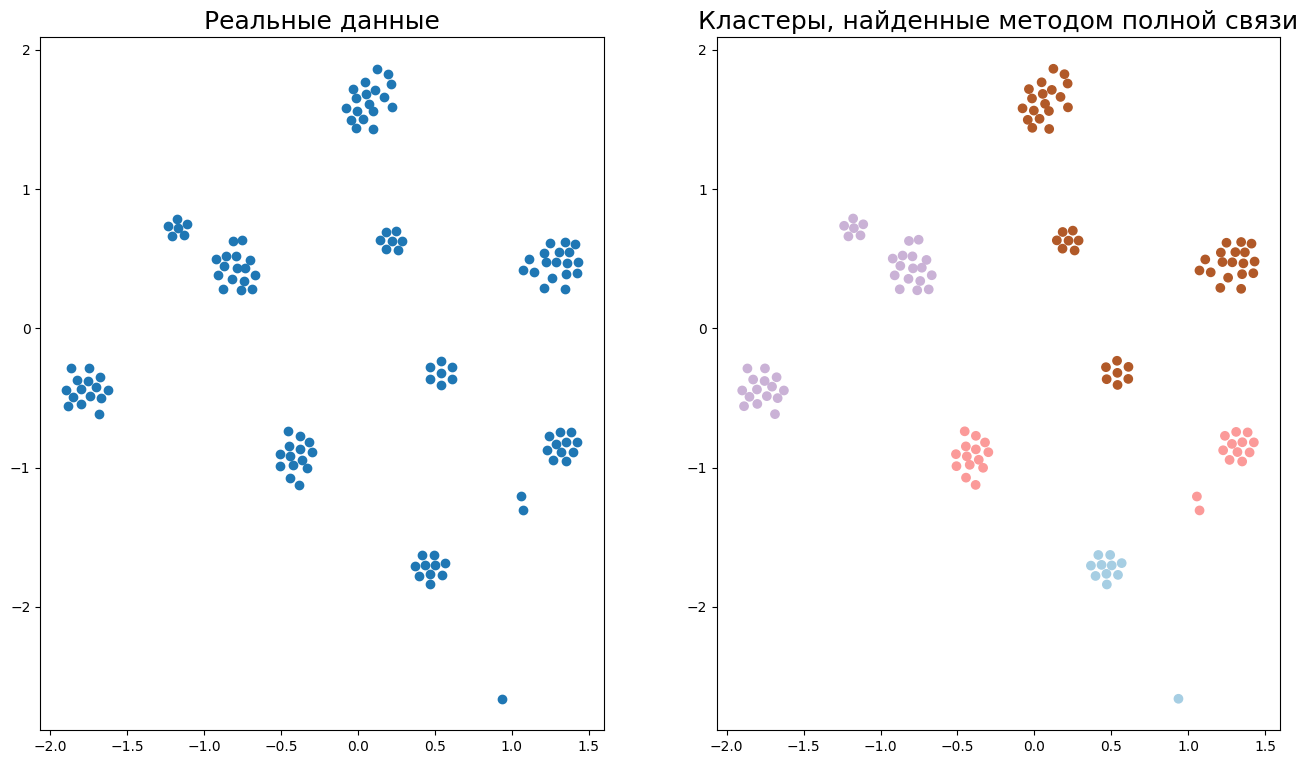

In [ ]:
result_complete = pd.DataFrame(fcluster(distance_matrix_complete, 4, criterion='maxclust'), columns=['target'])
fig, axes = plt.subplots(1, 2, figsize=(16,9))
axes[0].scatter(new_data.iloc[:,0], new_data.iloc[:,1])
axes[0].set_title("Реальные данные", fontsize = 18)
axes[1].scatter(new_data.iloc[:,0], new_data.iloc[:,1], c=result_complete.values, cmap = plt.cm.Paired)
axes[1].set_title("Кластеры, найденные методом полной связи", fontsize = 18)

In [ ]:
print(f"Индекс кластерного силуэта:{np.round(silhouette_score(new_data, result_complete.values.ravel()),2)}")
print(f"Индекс Дэвиса–Булдина:{np.round(davies_bouldin_score(new_data, result_complete.values.ravel()),2)}")
print(f"Коэффициент отношения вариаций: {np.round(calinski_harabasz_score(new_data, result_complete.values.ravel()),2)}")

Индекс кластерного силуэта:0.4300000071525574
Индекс Дэвиса–Булдина:1.03
Коэффициент отношения вариаций: 91.82


### Иерархическая кластеризация с использованием метода средней связи для вычисления расстояний между кластерами.

Иерархическая кластеризация с использованием метода средней связи - это метод кластеризации, который позволяет объединять объекты в кластеры на основе определения среднего расстояния между кластерами. В этом методе расстояние между кластерами вычисляется путем нахождения среднего арифметического расстояний между всеми парами объектов из разных кластеров. 

Алгоритм иерархической кластеризации с использованием метода средней связи начинается с того, что каждый объект инициализируется как отдельный кластер. Затем для каждой пары кластеров вычисляется расстояние с использованием метода средней связи. Кластеры, имеющие наименьшее расстояние между собой, объединяются в новый кластер, и процесс повторяется до тех пор, пока не будет получен один общий кластер, включающий все объекты. 

Метод средней связи имеет некоторые преимущества: он достаточно устойчив к выбросам и способен обнаруживать кластеры, которые могут быть сильно разнесены между собой в пространстве объектов. Однако у этого метода есть и недостатки: например, он может быть чувствителен к шуму и может разбивать непрерывный кластер на несколько частей.

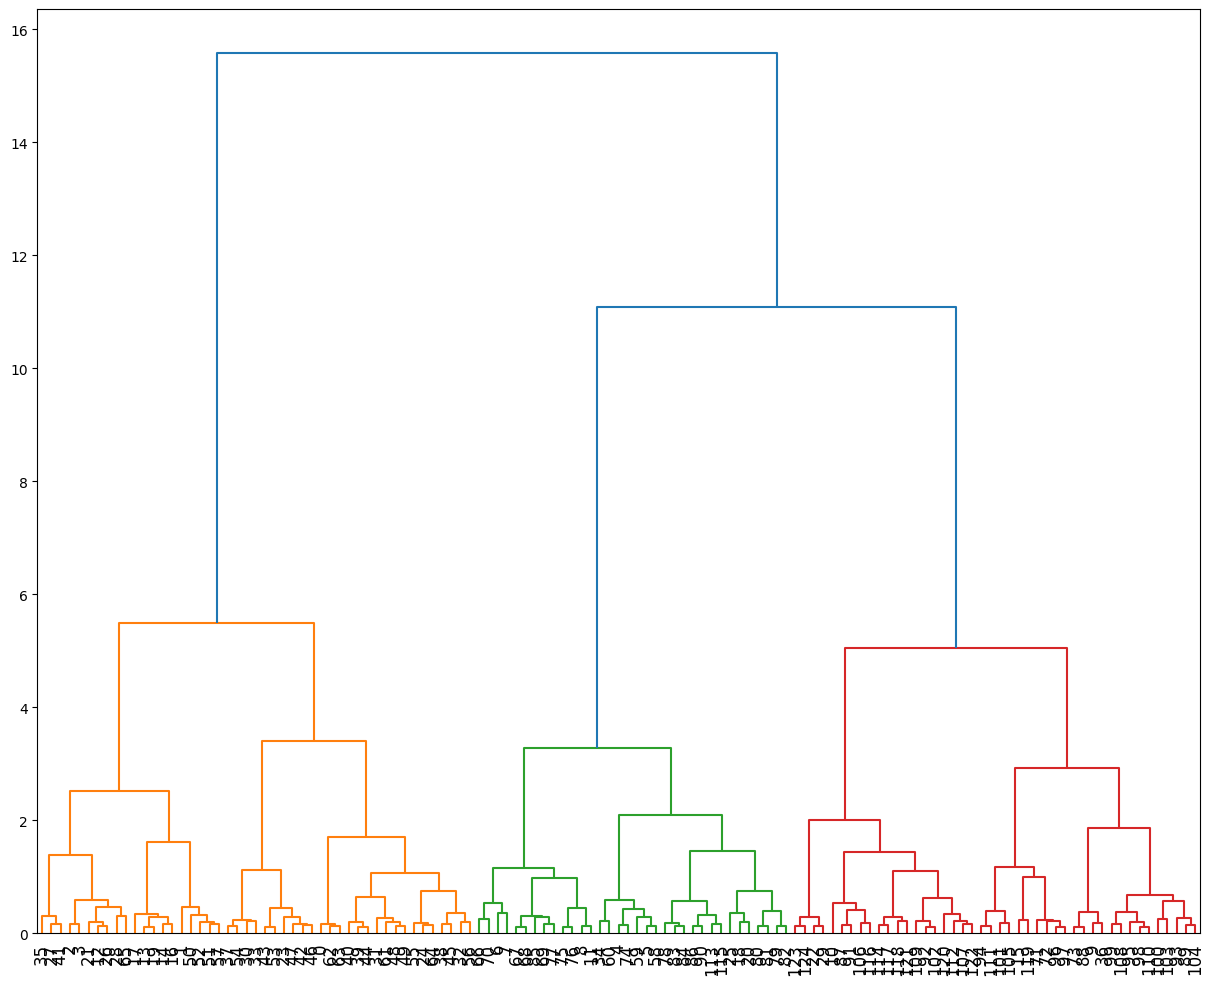

In [ ]:
#расчет матрицы связей
distance_matrix_average = linkage(new_data, method = 'average', metric = 'euclidean')

#построение дендрограммы
fig = plt.figure(figsize=(15,12))
fig.patch.set_facecolor('white')
R = dendrogram(distance_matrix, leaf_font_size=12)
plt.show()

С использованием метода средней связи были определены 4 кластера.

Text(0.5, 1.0, 'Кластеры, найденные методом средней связи')

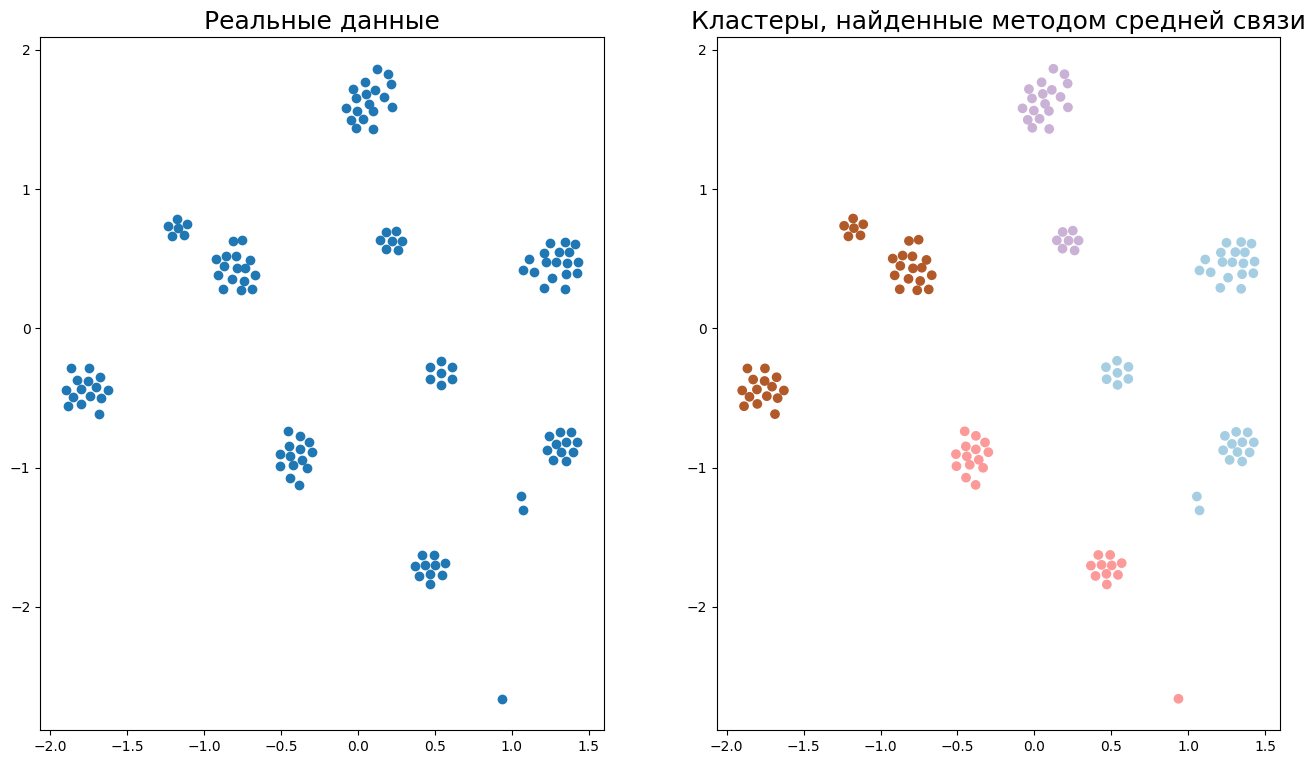

In [ ]:
result_average = pd.DataFrame(fcluster(distance_matrix_average, 4, criterion='maxclust'), columns=['target'])
fig, axes = plt.subplots(1, 2, figsize=(16,9))
axes[0].scatter(new_data.iloc[:,0], new_data.iloc[:,1])
axes[0].set_title("Реальные данные", fontsize = 18)
axes[1].scatter(new_data.iloc[:,0], new_data.iloc[:,1], c=result_average.values, cmap = plt.cm.Paired)
axes[1].set_title("Кластеры, найденные методом средней связи", fontsize = 18)

In [ ]:
print(f"Индекс кластерного силуэта:{np.round(silhouette_score(new_data, result_average.values.ravel()),2)}")
print(f"Индекс Дэвиса–Булдина:{np.round(davies_bouldin_score(new_data, result_average.values.ravel()),2)}")
print(f"Коэффициент отношения вариаций: {np.round(calinski_harabasz_score(new_data, result_average.values.ravel()),2)}")

Индекс кластерного силуэта:0.5199999809265137
Индекс Дэвиса–Булдина:0.73
Коэффициент отношения вариаций: 153.97


# Итерационная кластеризация

Итерационная кластеризация - это метод кластерного анализа, который заключается в составлении кластеров объектов пошагово путем их постоянного перераспределения в соответствии с определенным критерием похожести. Этот метод может использоваться в тех случаях, когда число кластеров неизвестно заранее. Алгоритм начинается с задания начальных центров кластеров, после чего каждый объект относится к ближайшему центру. Затем центры всех кластеров пересчитываются на основе выбранных объединений, и процесс перераспределения объектов повторяется. Алгоритм продолжается до тех пор, пока кластеры не перестанут менять свое расположение.

In [ ]:
new_data = new_data_main.copy()

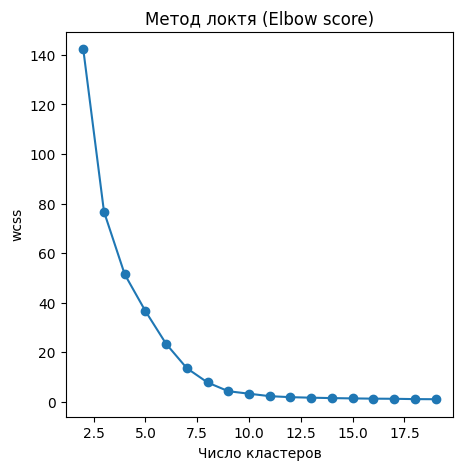

In [ ]:
# Расчет показателей WCSS и Silh при разном числе кластеров
wcss = []
count_clusters = np.arange(2,20)
for i in count_clusters:
    model = KMeans(n_clusters = i, n_init = 10)
    model.fit(new_data)
    wcss.append(model.inertia_)

# Построение графической зависимости для elbow score
fig = plt.figure(figsize=(5,5))
plt.plot(range(2, 20), wcss)
plt.title("Метод локтя (Elbow score)")
plt.xlabel('Число кластеров')
plt.ylabel('wcss')
plt.scatter(count_clusters, wcss)
plt.show()

Методом локтя определено, что оптимальное число кластеров равно 10.

### Метод k средних

Метод k средних является методом машинного обучения без учителя, который используется для разделения множества объектов на заданное число кластеров. Каждый кластер представляет собой группу объектов, которые максимально похожи друг на друга и наименее похожи на объекты других кластеров. 

Алгоритм метода k средних заключается в следующем:
1. Задается число кластеров (k) и выбираются случайно k точек в пространстве признаков.
2. Для каждой точки выбирается ближайшая к ней случайно выбранная точка из шага 1.
3. Для каждого кластера вычисляется центр масс объектов этого кластера.
4. Центры масс способствуют повторному шагу 2, пока изменения центров масс станут незначительными.

Mетод k средних может применяться в различных областях, например, для сегментации изображений, анализа данных, генетики и визуализации.

In [ ]:
new_data = new_data_main.copy()
model = KMeans(n_clusters=10, n_init=10)
model.fit(new_data)

prediction = model.predict(new_data)
result = pd.DataFrame(prediction, columns=['target'])
result.head()

,target
0,1
1,0
2,2
3,2
4,4


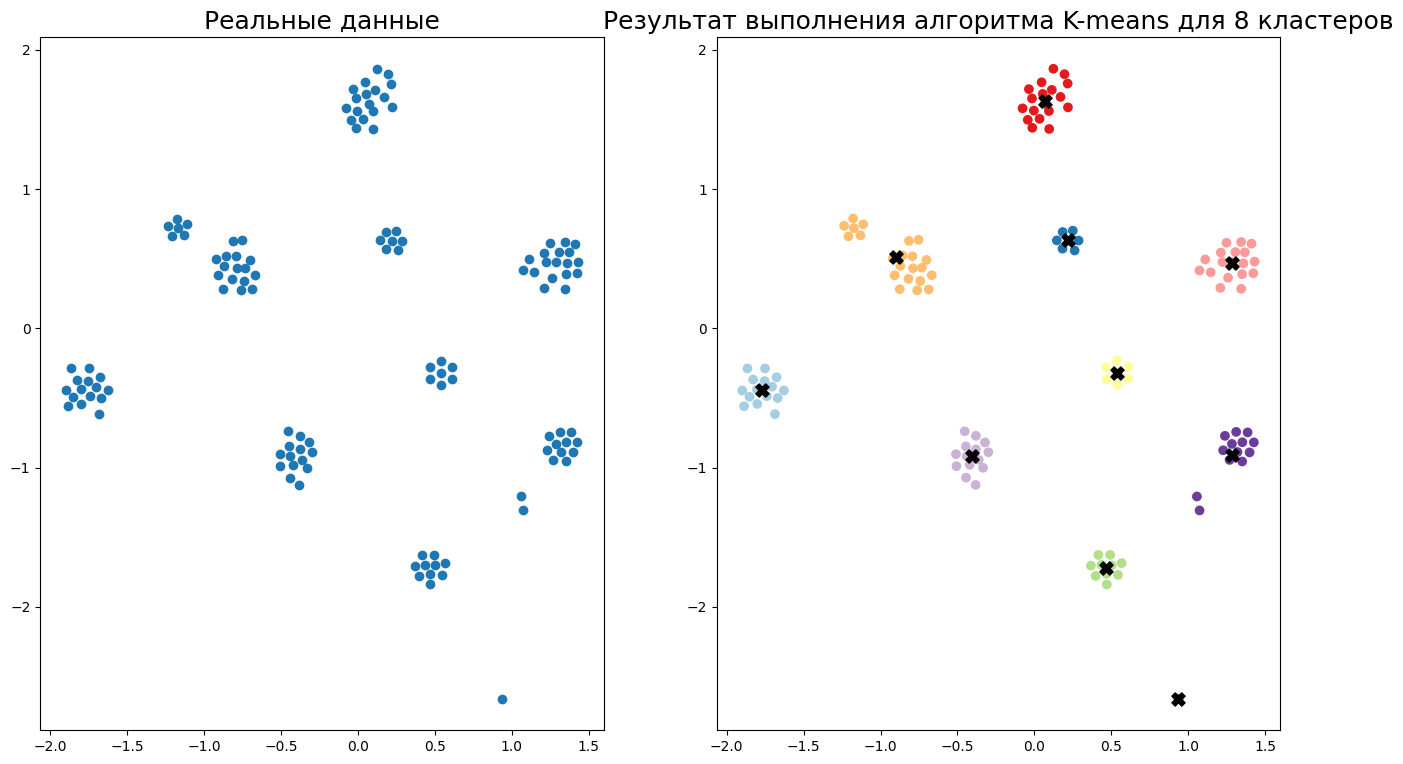

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16,9))
axes[0].scatter(new_data.iloc[:,0], new_data.iloc[:,1])
axes[0].set_title("Реальные данные", fontsize = 18)
axes[1].scatter(new_data.iloc[:,0], new_data.iloc[:,1], c=result.values, cmap = plt.cm.Paired)
axes[1].set_title("Результат выполнения алгоритма K-means для 8 кластеров", fontsize = 18)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s = 90, color='black', marker='X')

In [ ]:
print(f"Индекс кластерного силуэта:{np.round(silhouette_score(new_data, result.values.ravel()),2)}")
print(f"Индекс Дэвиса–Булдина:{np.round(davies_bouldin_score(new_data, result.values.ravel()),2)}")
print(f"Коэффициент отношения вариаций: {np.round(calinski_harabasz_score(new_data, result.values.ravel()),2)}")

Индекс кластерного силуэта:0.8100000023841858
Индекс Дэвиса–Булдина:0.22
Коэффициент отношения вариаций: 990.63


Кластеризация методом k средних показала более высокую эффективность, чем иерархические алгоритмы кластеризации.


In [ ]:
new_data = new_data_main.copy()
# Поиск оптимального числа кластеров
silh = []
for i in range(2, 20):
    fcm = FCM(n_clusters=i, n_init = 10)
    fcm.fit(new_data.values)
    cluster_labels = fcm.predict(new_data.values)
    silh.append(silhouette_score(new_data, cluster_labels, metric='euclidean'))

In [ ]:
silh

[0.41655973,
 0.46124333,
 0.485266,
 0.529709,
 0.63206327,
 0.6151284,
 0.7550639,
 0.7228664,
 0.7952025,
 0.6671541,
 0.72611725,
 0.595582,
 0.68139535,
 0.5589505,
 0.55835557,
 0.46963456,
 0.474118,
 0.43196222]

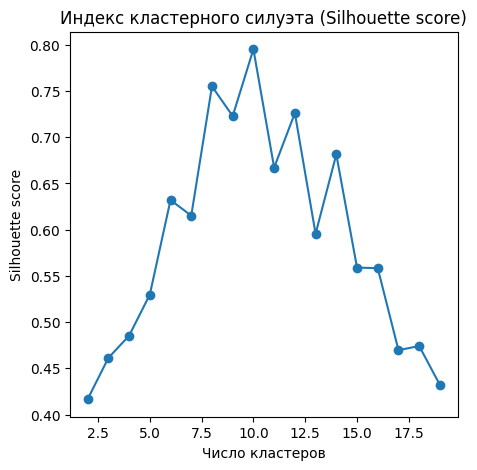

In [ ]:
# Построение графической зависимости для silhouette score
fig = plt.figure(figsize=(5,5))
plt.plot(range(2, 20), silh)
plt.title("Индекс кластерного силуэта (Silhouette score)")
plt.xlabel('Число кластеров')
plt.ylabel('Silhouette score')
plt.scatter(count_clusters, silh)
plt.show()

### Кластеризация с применением Fuzzy-C-Means алгоритма

Кластеризация с применением Fuzzy-C-Means (FCM) - это метод машинного обучения, используемый для разделения данных на группы (кластеры) на основе их сходства и различий. FCM алгоритм использует принцип нечеткой логики, который позволяет объектам принадлежать не только к одному кластеру, а с некоторой вероятностью к нескольким кластерам одновременно. Этот метод позволяет обрабатывать данные с нечеткими и неоднозначными свойствами.

В FCM алгоритме каждый кластер представлен небольшим числом центроидов, которые инициализируются случайным образом в начале алгоритма и обновляются на каждой итерации до тех пор, пока не будет достигнута определенная точность. Каждый объект в данных относится к каждому кластеру с определенной вероятностью, которая зависит от расстояния от объекта до центроида. 

Результатом работы FCM алгоритма является разбиение данных на определенное количество кластеров с определенными вероятностями для каждого объекта. 

FCM алгоритм широко используется в различных областях, таких как анализ данных, компьютерное зрение, биомедицинская инженерия и многие другие области.

In [ ]:
new_data = new_data_main.copy()
model = FCM(n_clusters = 8)
model.fit(new_data.values)
center = model.centers

result = pd.DataFrame(model.predict(new_data.values), columns=['target'])
result.head()

,target
0,6
1,4
2,7
3,7
4,6


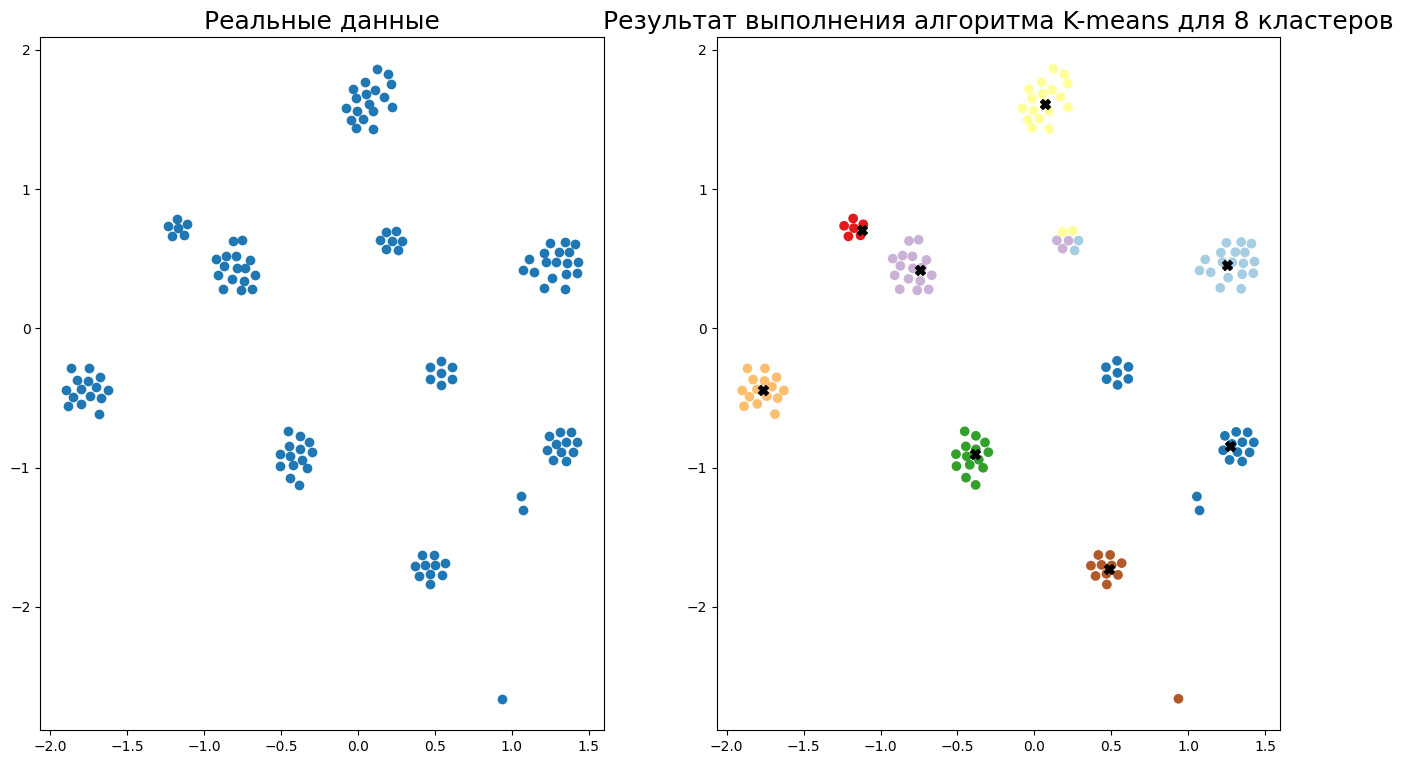

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16,9))
axes[0].scatter(new_data.iloc[:,0], new_data.iloc[:,1])
axes[0].set_title("Реальные данные", fontsize = 18)
axes[1].scatter(new_data.iloc[:,0], new_data.iloc[:,1], c=result.values, cmap = plt.cm.Paired)
axes[1].set_title("Результат выполнения алгоритма K-means для 8 кластеров", fontsize = 18)
plt.scatter(center[:,0], center[:,1], s = 50, color='black', marker='X')

In [ ]:
print(f"Индекс кластерного силуэта:{np.round(silhouette_score(new_data, result.values.ravel()),2)}")
print(f"Индекс Дэвиса–Булдина:{np.round(davies_bouldin_score(new_data, result.values.ravel()),2)}")
print(f"Коэффициент отношения вариаций: {np.round(calinski_harabasz_score(new_data, result.values.ravel()),2)}")

Индекс кластерного силуэта:0.6600000262260437
Индекс Дэвиса–Булдина:0.5
Коэффициент отношения вариаций: 298.92


### Кластеризация с применением DBSCAN алгоритма

Кластеризация с применением DBSCAN (Density-Based Spatial Clustering of Applications with Noise) алгоритма – это метод машинного обучения, который используется для группировки объектов в непересекающиеся кластеры на основе плотности распределения объектов в пространстве признаков. 

DBSCAN алгоритм хорошо работает, когда кластеры в данных имеют различные формы и размеры, и когда данные содержат шум и выбросы. Он определяет кластеры на основе двух параметров: радиуса Eps (epsilon) – это расстояние, определяющее радиус окрестности каждой точки, и минимального числа точек MinPts – это количество точек, которые должны входить в окрестность для того, чтобы эта область была распознана как кластер.

Алгоритм начинает построение кластеров в произвольном порядке. Затем для каждой точки в данных определяется ее окрестность радиуса epsilon и если в этой окрестности содержится больше или равно MinPts точек, то эта точка считается частью кластера. Если же в окрестности содержится меньше MinPts точек, то она считается выбросом.

Далее алгоритм для каждой точки считает ее связность. Точки, которые были найдены в окрестности Eps, являются соседями. Если существует цепочка связей между несколькими точками, то они считаются частью одного кластера.

В результате работы алгоритма мы получим набор кластеров точек, которые имеют высокую плотность распределения в пространстве признаков. DBSCAN алгоритм широко используется в задачах анализа данных, статистики, машинного зрения и машинного обучения.

In [ ]:
from math import sqrt
def calculate_kn_distance(X,k):
    kn_distance = []
    for i in range(len(X)):
        eucl_dist = []
        for j in range(len(X)):
            eucl_dist.append(math.sqrt((((X[i,0] - X[j,0]) ** 2) + ((X[i,1] - X[j,1]) ** 2))))
                             
        eucl_dist.sort()
        kn_distance.append(eucl_dist[k])
                             
    return kn_distance

Text(0.5, 0, 'Eps pасстояние')

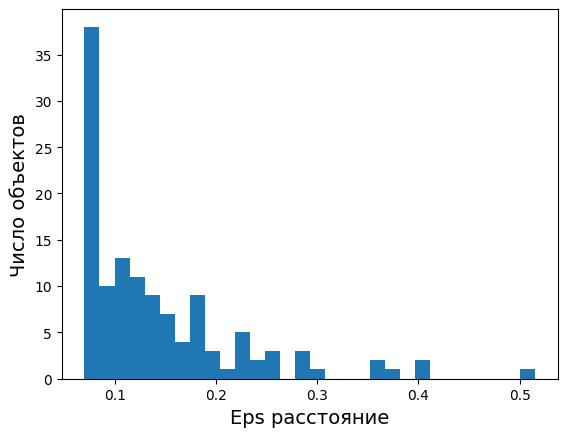

In [ ]:
eps_dist = calculate_kn_distance(scaled_data, 20)
plt.hist(eps_dist, bins=30)
plt.ylabel('Число объектов', size=14)
plt.xlabel('Eps pасстояние', size=14)

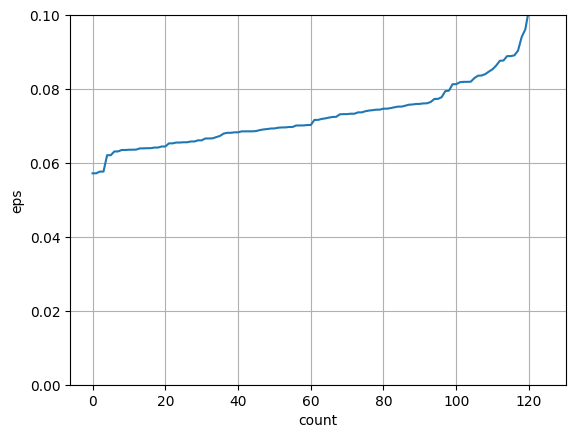

In [ ]:
new_data = new_data_main.copy()
neighbors = NearestNeighbors(n_neighbors = 20)
neighbors_fit = neighbors.fit(new_data)
distances, indices = neighbors_fit.kneighbors(new_data)
distances = np.sort(distances, axis = 0)
distances = distances[:,1]
plt.ylim(0, 0.1)
plt.plot(distances)
plt.ylabel('eps')
plt.xlabel('count')
plt.grid()

In [ ]:
model = DBSCAN(eps=0.2, min_samples=10)
model.fit(new_data)
result = pd.DataFrame(model.fit_predict(new_data), columns = ['target'])

comp = PCA(n_components = 2).fit_transform(new_data)

Text(0.5, 1.0, 'DBSCAN')

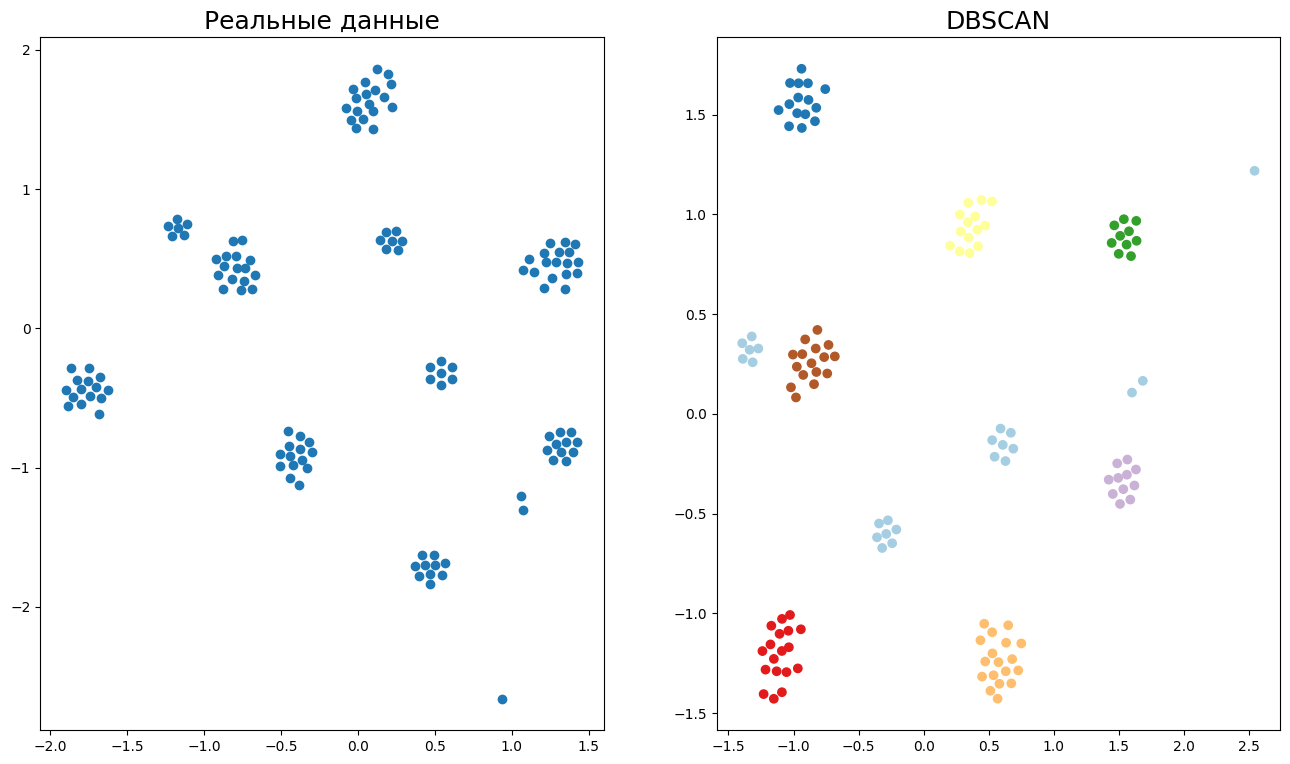

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16,9))
axes[0].scatter(new_data.iloc[:,0], new_data.iloc[:,1])
axes[0].set_title("Реальные данные", fontsize = 18)
axes[1].scatter(comp[:,0], comp[:,1], c = result.values, cmap = plt.cm.Paired)
axes[1].set_title("DBSCAN", fontsize = 18)

In [ ]:
print("Число кластеров: " + str(len(set(model.labels_))-1))
print("Количество шума: " + str(list(model.labels_).count(-1)))
print(f"Индекс кластерного силуэта:{np.round(silhouette_score(new_data, result.values.ravel()),2)}")
print(f"Индекс Дэвиса–Булдина:{np.round(davies_bouldin_score(new_data, result.values.ravel()),2)}")
print(f"Коэффициент отношения вариаций: {np.round(calinski_harabasz_score(new_data, result.values.ravel()),2)}")

Число кластеров: 7
Количество шума: 23
Индекс кластерного силуэта:0.6499999761581421
Индекс Дэвиса–Булдина:0.87
Коэффициент отношения вариаций: 112.85


## Вывод

Вывод на основе анализа четырех методов кластеризации и их оценки состоит в том, что число оптимальных кластеров равно 10. Это было определено при помощи Silh-индекса и метода локтя. Также стоит отметить, что наилучшие результаты показали методы k-средних и Fuzzy-C-Means. При этом все методы иерархической кластеризации дали примерно одинаковый результат.